In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lab-02-introduction-to-machine-learning/sample_submission.csv
/kaggle/input/lab-02-introduction-to-machine-learning/train.csv
/kaggle/input/lab-02-introduction-to-machine-learning/test.csv


In [2]:
df_train = pd.read_csv('../input/lab-02-introduction-to-machine-learning/train.csv')
df_test = pd.read_csv('../input/lab-02-introduction-to-machine-learning/test.csv')

In [3]:
df_train.head()

,ID,AT,V,AP,RH,EP
0,1,28.62,69.71,1009.67,62.12,437.52
1,2,14.84,41.48,1017.26,63.42,460.30
2,3,26.04,74.67,1016.68,81.20,433.55
3,4,13.55,42.99,1007.58,97.55,470.82
4,5,20.10,59.87,1018.97,87.23,444.71


In [4]:
df_test.head()

,ID,AT,V,AP,RH
0,8501,8.91,40.69,1015.11,89.65
1,8502,25.63,48.92,1009.99,34.64
2,8503,18.98,60.10,1010.09,85.34
3,8504,8.02,39.04,1018.49,68.07
4,8505,34.10,73.03,1014.01,41.26


In [5]:
columns=list(df_train.columns)
columns.remove('ID')
columns.remove('EP')
columns

['AT', 'V', 'AP', 'RH']

In [6]:
df_train.describe()

,ID,AT,V,AP,RH,EP
count,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.00000
mean,4250.500000,19.656261,54.310672,1013.254513,73.354868,454.33872
std,2453.882977,7.451720,12.699757,5.936605,14.628062,17.06837
min,1.000000,1.810000,25.360000,992.890000,25.560000,420.26000
25%,2125.750000,13.527500,41.740000,1009.117500,63.380000,439.72750
50%,4250.500000,20.360000,52.080000,1012.945000,75.025000,451.44000
75%,6375.250000,25.712500,66.540000,1017.240000,84.920000,468.43000
max,8500.000000,35.770000,80.250000,1033.290000,100.160000,495.76000


In [7]:
df_train.duplicated().sum()

0

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      8500 non-null   int64  
 1   AT      8500 non-null   float64
 2   V       8500 non-null   float64
 3   AP      8500 non-null   float64
 4   RH      8500 non-null   float64
 5   EP      8500 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 398.6 KB


In [9]:
df_train.isnull().sum()

ID    0
AT    0
V     0
AP    0
RH    0
EP    0
dtype: int64

In [10]:
df_train.drop('ID',axis=1,inplace=True)
df_train.columns

Index(['AT', 'V', 'AP', 'RH', 'EP'], dtype='object')

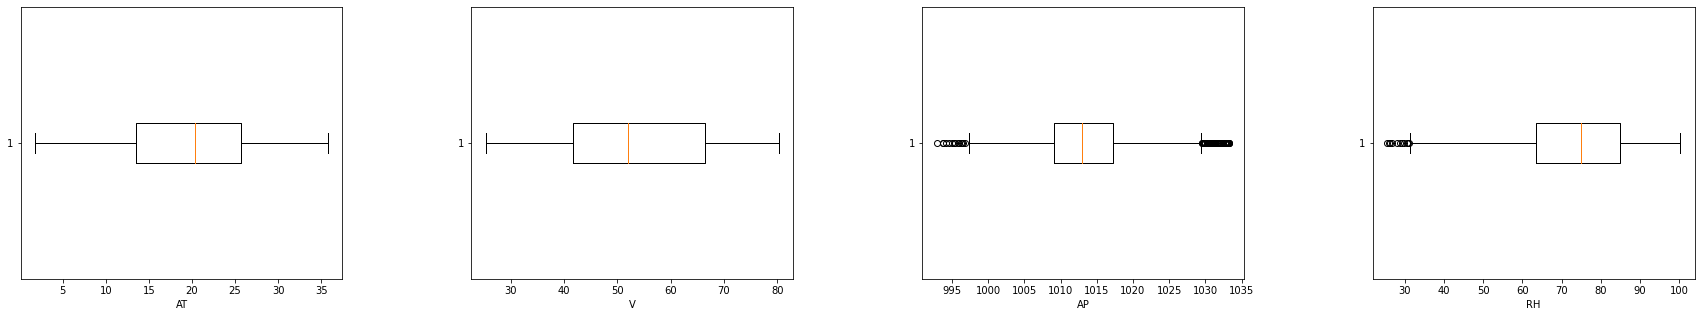

In [11]:
fig = plt.figure(figsize=(30,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1,5):
  fig.add_subplot(1,4,i)
  plt.boxplot(x=df_train[columns[i-1]],vert=False)
  plt.xlabel(columns[i-1])

In [12]:
#Detecting outliers using the Z-scores

def detect_outliers_zscore(data):
    outliers=[]
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    print(outliers)
    return outliers

def replace_outliers(data):
    outliers=detect_outliers_zscore(data)
    median = np.median(data)
    for i in outliers:
        data.replace(i,median,inplace=True) #Replace with median
    return data

In [13]:
for i in columns:
    print(i)
    replace_outliers(df_train[i])
    replace_outliers(df_test[i])

AT
[]
[]
V
[]
[]
AP
[1031.14, 995.24, 1031.1, 994.6, 995.02, 1032.72, 1031.39, 1032.14, 1031.21, 1031.33, 1032.77, 1033.04, 1031.16, 1031.97, 1031.27, 1031.45, 1032.86, 1032.08, 1031.8, 993.82, 1031.75, 1032.88, 1033.25, 1032.16, 1032.37, 1032.93, 1031.96, 1033.09, 1032.98, 994.17, 992.89, 1031.2, 1031.96, 1031.08, 1031.55, 1031.71, 1032.67, 1033.19, 1031.34, 1031.32, 1033.29, 993.74, 1033.08]
[1033.3, 993.11, 1032.83, 1031.5, 1031.58, 993.31, 1033.14, 1031.21]
RH
[25.89, 29.43, 28.16, 25.56, 28.81, 26.67, 26.3]
[]


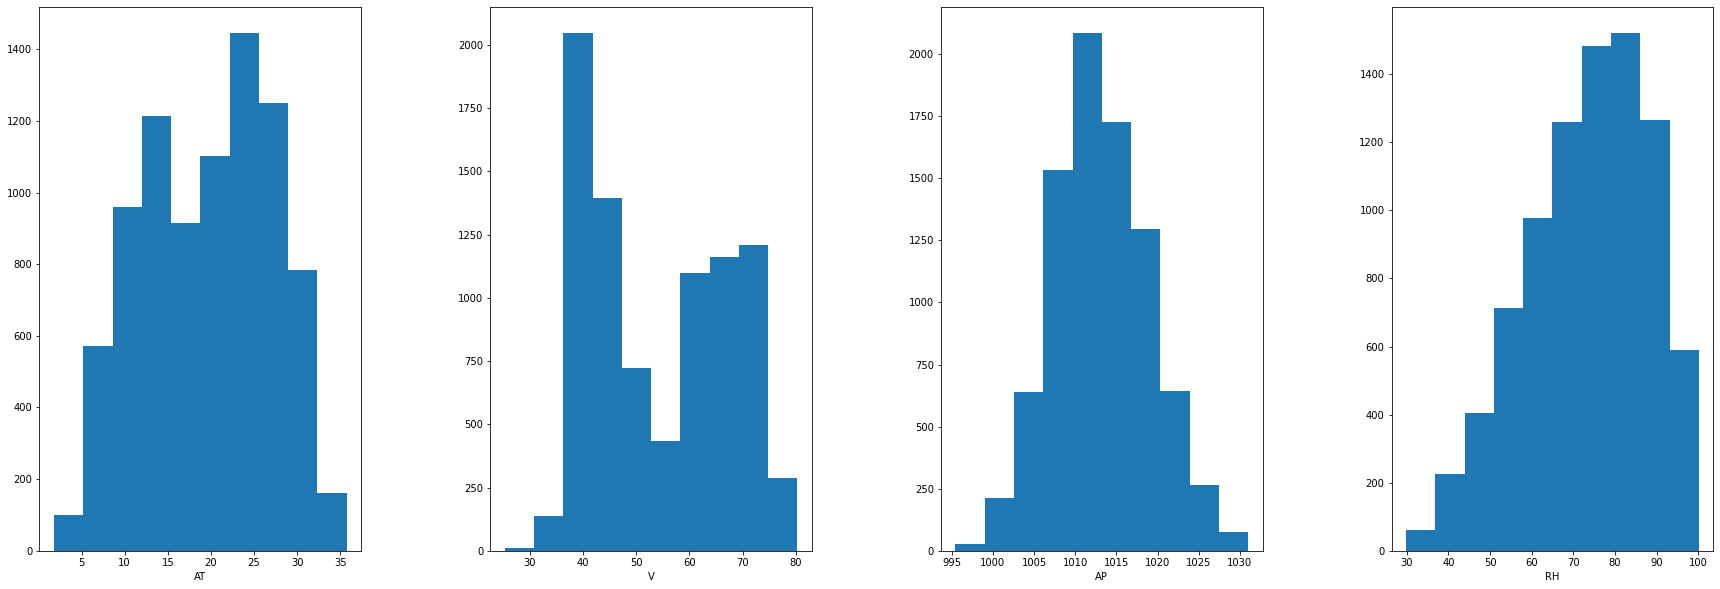

In [14]:
fig = plt.figure(figsize=(30,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1,5):
  fig.add_subplot(1,4,i)
  plt.hist(x=df_train[columns[i-1]])
  plt.xlabel(columns[i-1])

In [15]:
df_train.skew().sort_values(ascending=False)

EP    0.310312
AP    0.203252
V     0.197274
AT   -0.139852
RH   -0.421310
dtype: float64

In [16]:
print(np.log(df_train['RH']).skew())
print(np.sqrt(df_train['RH']).skew())

from scipy import stats
print(pd.Series(stats.boxcox(df_train['RH'])[0]).skew())

df_train['RH']=pd.Series(stats.boxcox(df_train['RH'])[0])
df_test['RH']=pd.Series(stats.boxcox(df_test['RH'])[0])

-0.9131421605061784
-0.6529931583127927
-0.10667164773959416


In [17]:
df_train.skew().sort_values(ascending=False)

EP    0.310312
AP    0.203252
V     0.197274
RH   -0.106672
AT   -0.139852
dtype: float64

(array([ 160.,  481.,  791., 1018., 1199., 1325., 1237., 1219.,  678.,
         392.]),
 array([ 230.99108612,  405.40062806,  579.81016999,  754.21971193,
         928.62925387, 1103.03879581, 1277.44833775, 1451.85787969,
        1626.26742163, 1800.67696357, 1975.0865055 ]),
 <BarContainer object of 10 artists>)

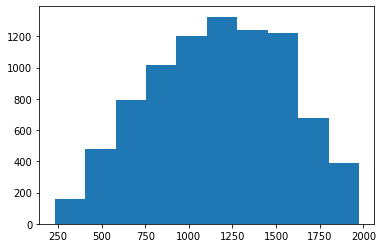

In [18]:
plt.hist(df_train['RH'])

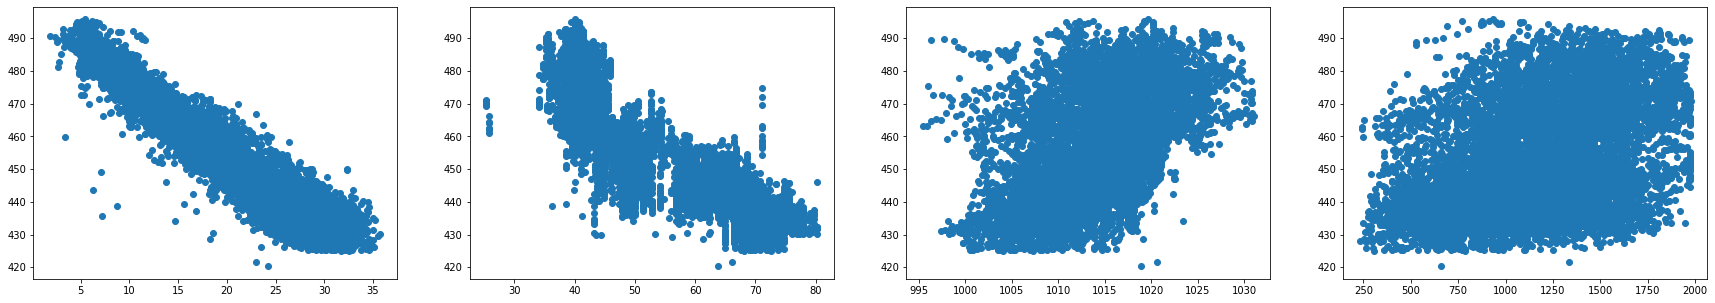

In [19]:
fig=plt.figure(figsize=(30,5))
for i in range(1,5):
    fig.add_subplot(1,4,i)
    plt.scatter(df_train[columns[i-1]],df_train['EP'])

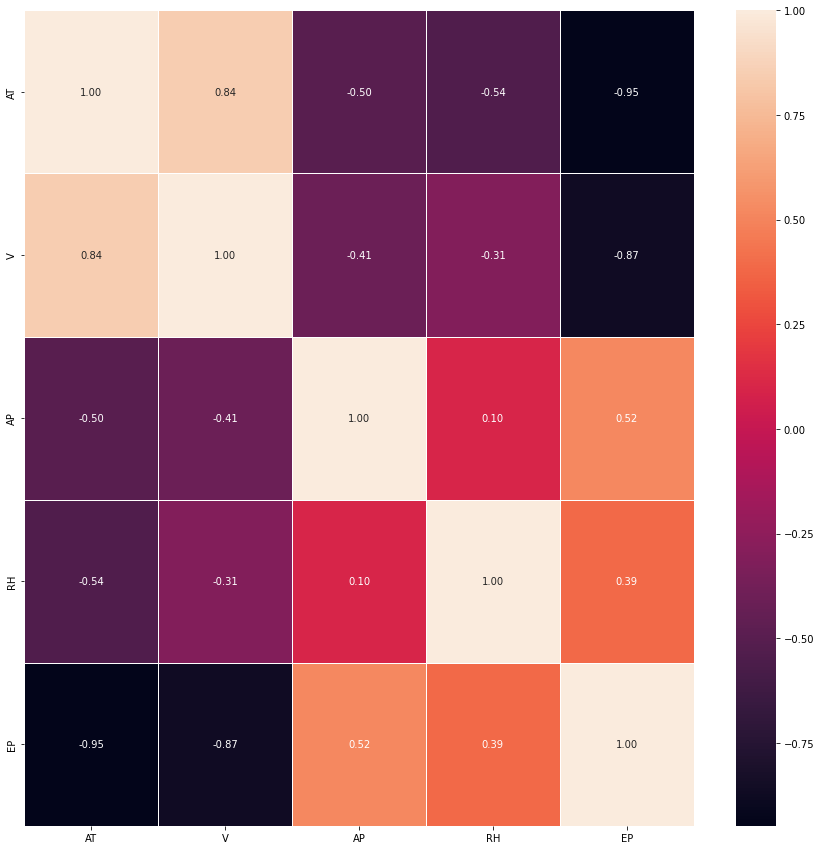

In [20]:
f,ax = plt.subplots(figsize=(15,15))
sns.heatmap(df_train.corr(), annot=True, linewidths=.5, fmt='.2f', ax=ax)
plt.show()

In [21]:
X_train = df_train.iloc[:, :-1].values
y = df_train.iloc[:, -1].values

In [22]:
df_test_copy=df_test.copy()
ID_test=df_test['ID'].values
df_test.drop('ID',axis=1,inplace=True)
X_test = df_test.values

Train set split

In [23]:
from sklearn.model_selection import train_test_split
X0_train, X0_test, y0_train, y0_test = train_test_split(X_train, y, test_size = 0.2, random_state = 0)

Polynomial Regression

In [24]:
#Training the Polynomial Regression model on the Training set
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X0_train)
regressor = LinearRegression()
regressor.fit(X_poly, y0_train)

LinearRegression()

In [25]:
# Predicting the Test set results
y_pol_pred = regressor.predict(poly_reg.transform(X0_test))

In [26]:
#print(y_pred)

Random forest regression

In [27]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)    

regressor.fit(X0_train, y0_train)
regressor.fit(X_train, y)

y_random_pred = regressor.predict(X0_test)
y_random_pred_0 = regressor.predict(X_test)

Random Forest Hyperparameter Tuning using GridSearchCV

In [28]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


Hyper parameters

In [29]:
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint

In [30]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)
{'bootstrap': [True, False],
 'max_depth': [1,2,3,4,5],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2],
 'min_samples_split': [2, 5],
 'n_estimators': []}

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


{'bootstrap': [True, False],
 'max_depth': [1, 2, 3, 4, 5],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2],
 'min_samples_split': [2, 5],
 'n_estimators': []}

In [31]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 3, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X0_train, y0_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=3, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [32]:
y_hyper_pred=rf_random.predict(X0_test)
y_hyper_prde_0=rf_random.predict(X_test)

Evaluation matrix

In [33]:
from sklearn.metrics import mean_absolute_error
pol_mae = mean_absolute_error(y0_test, y_pol_pred)
print(pol_mae)
random_mae = mean_absolute_error(y0_test, y_random_pred)
print(random_mae)
hyper_mae = mean_absolute_error(y0_test, y_hyper_pred)
print(hyper_mae)

3.2919606702939057
0.9834829411764717
2.330866149795222


In [34]:
from IPython.display import HTML
import base64
def create_download_link(df, title = "Download CSV file", filename = "data.csv"):  
    csv = df.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

In [35]:
id=df_test_copy['ID'].values
finale_np_array=np.concatenate((id.reshape(len(id),1), y_hyper_prde_0.reshape(len(y_hyper_prde_0),1)),axis=1)
answer_df=pd.DataFrame(finale_np_array,columns=['ID','EP'])
answer_df.head()

,ID,EP
0,8501.0,478.842576
1,8502.0,444.084424
2,8503.0,450.981210
3,8504.0,482.854541
4,8505.0,435.902364


In [36]:
create_download_link(answer_df)